<a href="https://colab.research.google.com/github/ImtiazAhmed07/neural-networks-tasks/blob/main/Neural_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.0939
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.0930
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.0909
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.0886
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 0.0870
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.0851
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.0812
Epoch 8/50
1/1 [==============================] - 1s 1s/step - loss: 0.0781
Epoch 9/50
1/1 [==============================] - 1s 1s/step - loss: 0.0726
Epoch 10/50
1/1 [==============================] - 1s 1s/step - loss: 0.0650
Epoch 11/50
1/1 [==============================] - 1s 1s/step - loss: 0.0571
Epoch 12/50
1/1 [==============================] - 1s 1s/step - loss: 0.0831
Epoch 13/50
1/1 [==============================] - 1s 1s/step - loss: 0.0715
Epoch 14

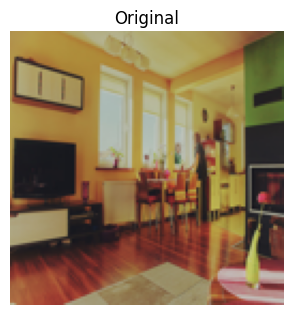

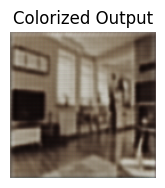

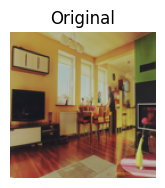

1/1 [==============================] - 0s 147ms/step


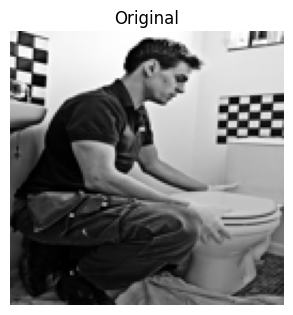

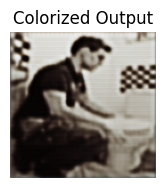

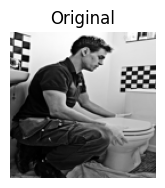

1/1 [==============================] - 0s 137ms/step


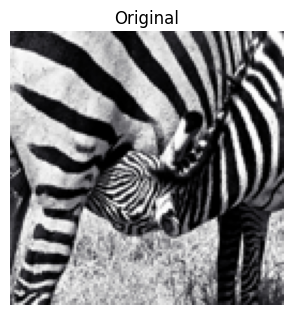

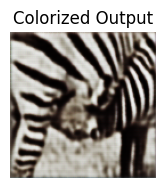

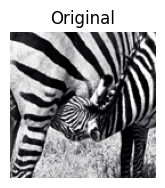

1/1 [==============================] - 0s 243ms/step
Test Loss: 0.011326478173335394


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

# Display image function
def display_image(image_data, title="Image"):
    plt.imshow(image_data)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load images from directory
def load_images(directory, image_size=(128, 128)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(directory, filename))
            img = img.resize(image_size)  # Resize to desired pixels
            img = np.array(img)
            if len(img.shape) == 2:
                img = np.expand_dims(img, axis=-1)  # Add channel dimension if grayscale
                img = np.repeat(img, 3, axis=-1)  # Convert grayscale to RGB
            images.append(img)
    return np.array(images)

# Define the network architecture using Keras
input_shape = (128, 128, 3)  # Input size for RGB images

input_img = Input(shape=input_shape)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
encoded = Flatten()(x)

x = Reshape((32, 32, 256))(encoded)
x = Conv2DTranspose(256, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss=MeanSquaredError())

# Training function
def train_network(train_data, epochs, batch_size):
    autoencoder.fit(train_data, train_data, epochs=epochs, batch_size=batch_size, shuffle=True)

# Visualize results
def visualize_results(train_data):
    for img in train_data[:5]:
        img = img.reshape(128, 128, 3)
        colorized_output = autoencoder.predict(img.reshape(1, 128, 128, 3))
        colorized_output = (colorized_output[0] * 255).astype(np.uint8)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        display_image(img, title="Original")
        plt.subplot(1, 3, 2)
        display_image(colorized_output, title="Colorized Output")
        plt.subplot(1, 3, 3)
        display_image(img, title="Original")  # Show original again for comparison
        plt.show()

# Save the model
def save_model():
    autoencoder.save_weights("autoencoder_weights.h5")

# Load the model
def load_model():
    autoencoder.load_weights("autoencoder_weights.h5")

# Evaluate the network on test data
def evaluate_network(test_data):
    total_loss = 0
    for img in test_data:
        img = img.reshape(1, 128, 128, 3)
        output_data = autoencoder.predict(img)
        total_loss += np.mean((output_data - img) ** 2)

    avg_loss = total_loss / len(test_data)
    print(f"Test Loss: {avg_loss}")

if __name__ == "__main__":
    # Example usage

    # Load images from a directory
    train_data = load_images(r"/content/pics")

    # Normalize data
    train_data = train_data.astype(np.float32) / 255.0

    # Train the network
    train_network(train_data, epochs=50, batch_size=16)

    # Visualize some results
    visualize_results(train_data)

    # Save the model
    save_model()

    # Load the model (for testing purposes)
    load_model()

    # Evaluate on test data (using training data for simplicity)
    evaluate_network(train_data)
